# Credit Card Visualize Importance

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns

# Data preparation

In [2]:
df = pd.read_csv("cc_approvals.data",header=None)

df.columns=['Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'EducationLevel', 'Ethnicity', 'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore', 'DriversLicense', 'Citizen', 'ZipCode', 'Income', 'ApprovalStatus']
display(df)

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-


In [3]:
random.seed(2023)
N=list(range(len(df)))
random.shuffle(N)
df=df.iloc[N]

In [4]:
from sklearn.preprocessing import LabelEncoder

def labelencoder(df):
    for c in df.columns:
        if df[c].dtype=='object': 
            df[c] = df[c].fillna('N')
            lbl = LabelEncoder()
            lbl.fit(list(df[c].values))
            df[c] = lbl.transform(df[c].values)
    return df

In [5]:
df2=labelencoder(df)
display(df2)

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
406,1,239,8.125,3,3,9,8,0.165,0,1,2,0,0,170,18,1
559,1,73,2.290,2,1,11,4,2.290,1,1,7,1,0,44,2384,0
475,2,114,2.000,2,1,4,8,0.750,0,0,0,1,0,23,0,1
441,2,234,5.000,2,1,6,3,0.000,0,1,2,0,0,1,1,1
377,2,48,0.835,3,3,2,8,2.000,0,0,0,1,2,84,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625,2,83,12.000,2,1,2,8,2.085,0,0,0,0,2,23,0,1
327,0,241,3.500,2,1,7,1,0.500,0,0,0,0,2,168,0,1
398,2,108,12.500,3,3,9,4,1.250,0,0,0,1,0,0,17,1
457,2,142,0.750,3,3,2,8,0.040,0,0,0,0,0,84,0,1


# Target setting

In [6]:
target=['ApprovalStatus']
dataY=df2[target]
dataX=df2.drop(target,axis=1)
trainY=dataY
trainX=dataX

In [7]:
df_columns = list(dataX.columns)
print(df_columns)

['Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'EducationLevel', 'Ethnicity', 'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore', 'DriversLicense', 'Citizen', 'ZipCode', 'Income']


In [8]:
train_df=pd.DataFrame(trainX)
#test_df=pd.DataFrame(testX)

train_df.columns=df_columns
#test_df.columns=df_columns

In [9]:
def create_numeric_feature(input_df):
    use_columns = df_columns 
    return input_df[use_columns].copy()

In [10]:
from time import time

class Timer:
    def __init__(self, logger=None, format_str='{:.3f}[s]', prefix=None, suffix=None, sep=' '):

        if prefix: format_str = str(prefix) + sep + format_str
        if suffix: format_str = format_str + sep + str(suffix)
        self.format_str = format_str
        self.logger = logger
        self.start = None
        self.end = None

    @property
    def duration(self):
        if self.end is None:
            return 0
        return self.end - self.start

    def __enter__(self):
        self.start = time()

    def __exit__(self, exc_type, exc_val, exc_tb):
        self.end = time()
        out_str = self.format_str.format(self.duration)
        if self.logger:
            self.logger.info(out_str)
        else:
            print(out_str)

In [11]:
from tqdm import tqdm

def to_feature(input_df):

    processors = [
        create_numeric_feature,
    ]
    
    out_df = pd.DataFrame()
    
    for func in tqdm(processors, total=len(processors)):
        with Timer(prefix='create' + func.__name__ + ' '):
            _df = func(input_df)

        assert len(_df) == len(input_df), func.__name__
        out_df = pd.concat([out_df, _df], axis=1)
        
    return out_df

In [12]:
train_feat_df = to_feature(train_df)
#test_feat_df = to_feature(test_df)

100%|██████████| 1/1 [00:00<00:00, 499.68it/s]

createcreate_numeric_feature  0.001[s]


# Model

In [13]:
import lightgbm as lgbm
from sklearn.metrics import mean_squared_error

def fit_lgbm(X, y, cv, 
             params: dict=None, 
             verbose: int=50):

    if params is None:
        params = {}

    models = []
    oof_pred = np.zeros_like(y, dtype=float)

    for i, (idx_train, idx_valid) in enumerate(cv): 
        x_train, y_train = X[idx_train], y[idx_train]
        x_valid, y_valid = X[idx_valid], y[idx_valid]

        clf = lgbm.LGBMRegressor(**params)
        
        callbacks =  [lgbm.early_stopping(stopping_rounds=30),lgbm.log_evaluation(period=verbose)]
        with Timer(prefix='fit fold={} '.format(i)):
            clf.fit(x_train, y_train, 
                    eval_set=[(x_valid, y_valid)],  
                    callbacks=callbacks)

        pred_i = clf.predict(x_valid)
        oof_pred[idx_valid] = pred_i
        models.append(clf)
        print(f'Fold {i} RMSLE: {mean_squared_error(y_valid, pred_i) ** .5:.4f}')
        print()

    score = mean_squared_error(y, oof_pred) ** .5
    print('-' * 50)
    print('FINISHED | Whole RMSLE: {:.4f}'.format(score))
    return oof_pred, models

In [14]:
params = {
    'objective': 'rmse', 
    'learning_rate': .1,
    'reg_lambda': 1.,
    'reg_alpha': .1,
    'max_depth': 5, 
    'n_estimators': 10000, 
    'colsample_bytree': .5, 
    'min_child_samples': 10,
    'subsample_freq': 3,
    'subsample': .9,
    'importance_type': 'gain', 
    'random_state': 71,
    'num_leaves': 62,
    "verbose": -1
}

In [15]:
ydf = trainY

Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[57]	valid_0's rmse: 0.295157
fit fold=0  0.138[s]
Fold 0 RMSLE: 0.2952

Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[52]	valid_0's rmse: 0.297552
fit fold=1  0.038[s]
Fold 1 RMSLE: 0.2976

Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[21]	valid_0's rmse: 0.321464
fit fold=2  0.018[s]
Fold 2 RMSLE: 0.3215

Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[107]	valid_0's rmse: 0.305644
fit fold=3  0.036[s]
Fold 3 RMSLE: 0.3056

Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[67]	valid_0's rmse: 0.308436
fit fold=4  0.024[s]
Fold 4 RMSLE: 0.3084

--------------------------------------------------
FINISHED | Whole RMSLE: 0.3058


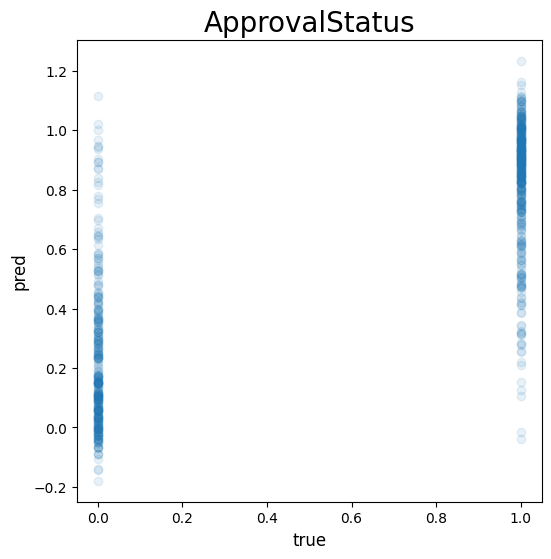

In [16]:
from sklearn.model_selection import KFold

for i in range(1):
    fold = KFold(n_splits=5, shuffle=True, random_state=71)
    ydfi=ydf.iloc[:,i]
    y=np.array(ydfi)
    cv = list(fold.split(train_feat_df, y))
    oof, models = fit_lgbm(train_feat_df.values, y, cv, params=params, verbose=500)
    
    fig,ax = plt.subplots(figsize=(6,6))
    ax.set_title(target[i],fontsize=20)
    ax.set_ylabel('pred',fontsize=12)
    ax.set_xlabel('true',fontsize=12)
    ax.scatter(y,oof,alpha=0.1)


# Visualize Importance

In [17]:
def visualize_importance(models, feat_train_df):

    feature_importance_df = pd.DataFrame()
    for i, model in enumerate(models):
        _df = pd.DataFrame()
        _df['feature_importance'] = model.feature_importances_
        _df['column'] = feat_train_df.columns
        _df['fold'] = i + 1
        feature_importance_df = pd.concat([feature_importance_df, _df], 
                                          axis=0, ignore_index=True)

    order = feature_importance_df.groupby('column')\
        .sum()[['feature_importance']]\
        .sort_values('feature_importance', ascending=False).index[:50]

    print(order.tolist())
    
    fig, ax = plt.subplots(figsize=(8, max(6, len(order) * .25)))
    sns.boxenplot(data=feature_importance_df, 
                  x='feature_importance', 
                  y='column',
                  hue='column', 
                  order=order, 
                  ax=ax, 
                  palette='viridis', 
                  orient='h')
    
    ax.tick_params(axis='x', rotation=0)
    #ax.set_title('Importance')
    ax.grid()
    fig.tight_layout()
    
    return fig,ax

#fig, ax = visualize_importance(models, train_feat_df)

Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[57]	valid_0's rmse: 0.295157
fit fold=0  0.026[s]
Fold 0 RMSLE: 0.2952

Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[52]	valid_0's rmse: 0.297552
fit fold=1  0.020[s]
Fold 1 RMSLE: 0.2976

Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[21]	valid_0's rmse: 0.321464
fit fold=2  0.013[s]
Fold 2 RMSLE: 0.3215

Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[107]	valid_0's rmse: 0.305644
fit fold=3  0.034[s]
Fold 3 RMSLE: 0.3056

Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[67]	valid_0's rmse: 0.308436
fit fold=4  0.020[s]
Fold 4 RMSLE: 0.3084

--------------------------------------------------
FINISHED | Whole RMSLE: 0.3058
['PriorDefault', 'Income', 'CreditScore', 'Debt', 'ZipCode', 'YearsEmplo

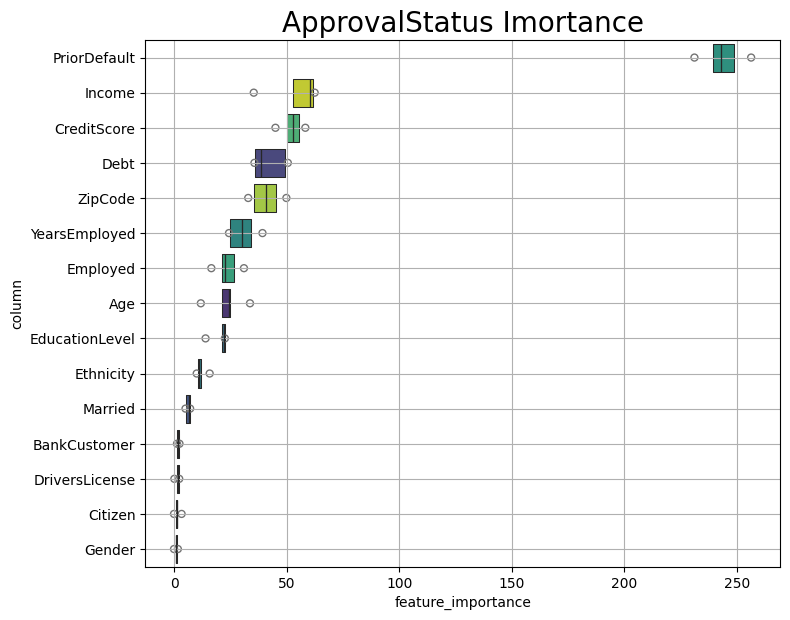

In [18]:
for i in range(1):
    fold = KFold(n_splits=5, shuffle=True, random_state=71)
    ydfi=ydf.iloc[:,i]
    y=np.array(ydfi)
    cv = list(fold.split(train_feat_df, y))
    oof, models = fit_lgbm(train_feat_df.values, y, cv, params=params, verbose=500)
    fig, ax = visualize_importance(models, train_feat_df)
    ax.set_title(target[i]+' Imortance',fontsize=20)

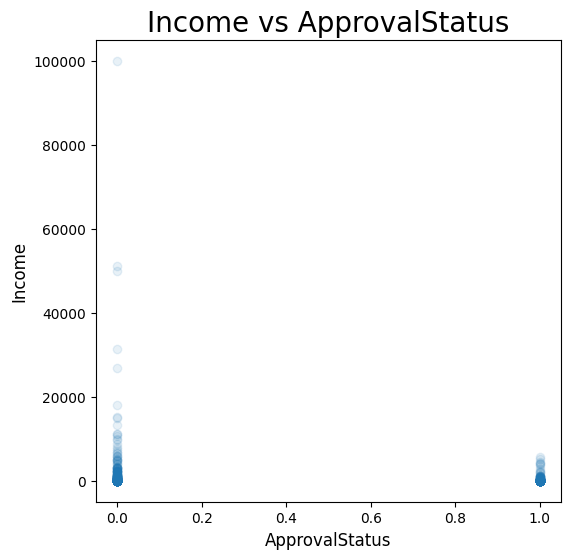

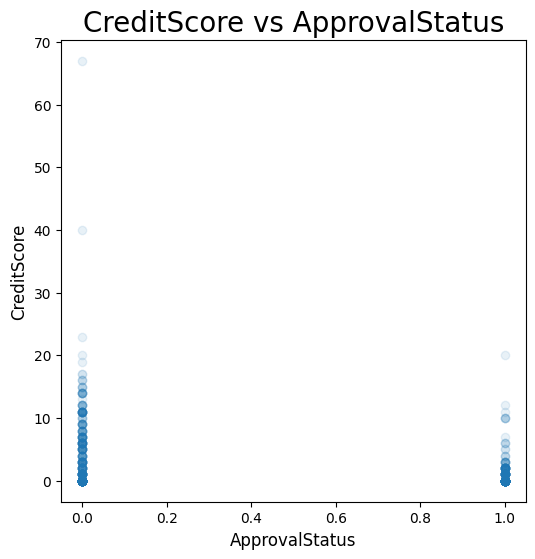

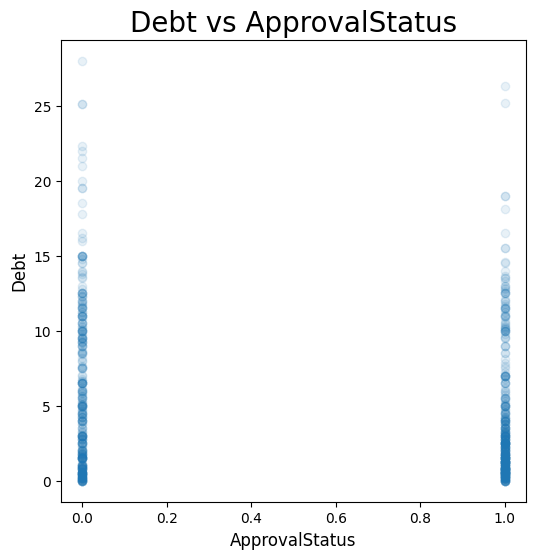

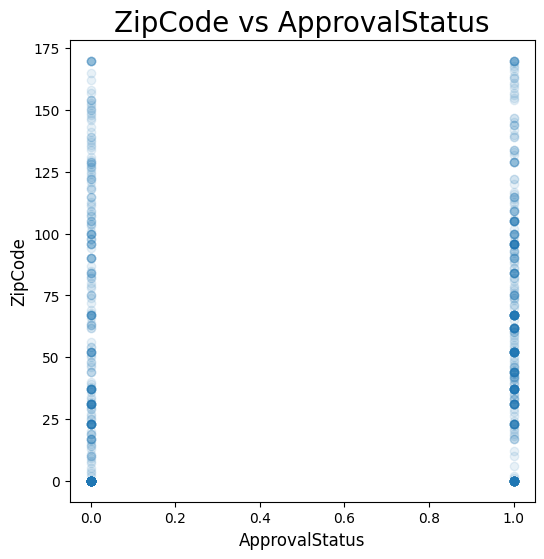

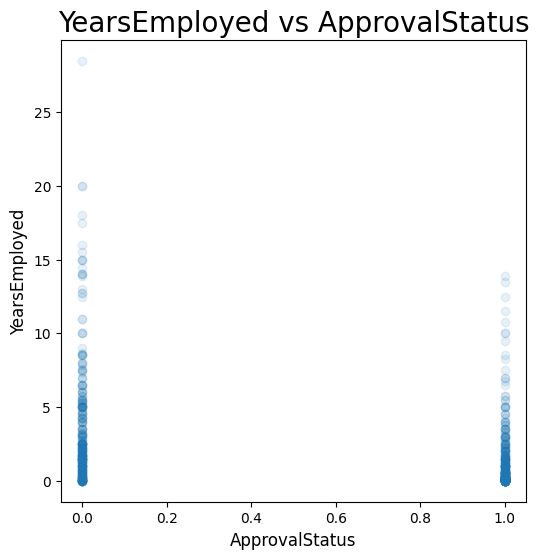

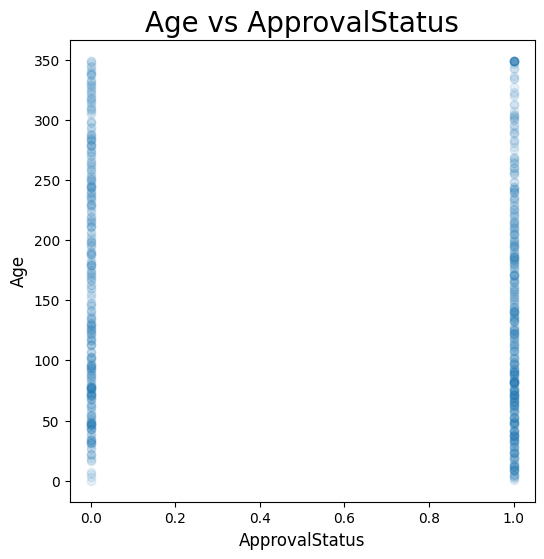

In [19]:
cols=['Income', 'CreditScore', 'Debt', 'ZipCode', 'YearsEmployed', 'Age']
for col in cols:
    fig,ax = plt.subplots(figsize=(6,6))
    ax.set_title(col+' vs ApprovalStatus',fontsize=20)
    ax.set_xlabel('ApprovalStatus',fontsize=12)
    ax.set_ylabel(col,fontsize=12)
    ax.scatter(df['ApprovalStatus'],df[col],alpha=0.1)    